In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [153]:
AREA = 'Львівська'
BBOX = (22.083, 40.276, 44.256, 52.506)

In [154]:
df = pd.read_csv('data/covid19_by_settlement_dynamics.csv')
df.head()

,zvit_date,registration_area,registration_region,registration_settlement,new_susp,new_confirm,active_confirm,new_death,new_recover
0,2020-10-26,Вінницька,Барський район,Антонівка,0,0,1,0,0
1,2020-10-26,Вінницька,Барський район,Бар,0,0,34,0,0
2,2020-10-26,Вінницька,Барський район,Войнашівка,0,0,1,0,0
3,2020-10-26,Вінницька,Барський район,Володіївці,0,0,1,0,0
4,2020-10-26,Вінницька,Барський район,Гавришівка,0,0,1,0,0


In [155]:
df_with_lat_lon = pd.read_csv('data/covid19_by_settlement_actual.csv')
df_with_lat_lon.head()

,zvit_date,registration_area,registration_region,registration_settlement,registration_settlement_lng,registration_settlement_lat,total_susp,total_confirm,total_death,total_recover
0,2020-10-26,Вінницька,Барський район,Антонівка,27.785871,49.086871,2,1,0,0
1,2020-10-26,Вінницька,Барський район,Балки,27.683143,49.060322,3,3,0,3
2,2020-10-26,Вінницька,Барський район,Бар,27.682612,49.076848,79,67,1,32
3,2020-10-26,Вінницька,Барський район,Верхівка,27.654117,48.902205,1,0,0,0
4,2020-10-26,Вінницька,Барський район,Войнашівка,27.719144,49.049600,1,1,0,0


In [156]:
df = df[df.registration_area == AREA]

In [157]:
df.drop(columns=['registration_area', 'registration_region', 'registration_settlement'], inplace=True)

In [158]:
df = df.groupby('zvit_date').sum()
len(df)

228

In [159]:
df['new_susp_cumsum'] = df['new_susp'].cumsum()
df['new_confirm_cumsum'] = df['new_confirm'].cumsum()
df['new_death_cumsum'] = df['new_death'].cumsum()
df['new_recover_cumsum'] = df['new_recover'].cumsum()
df

,new_susp,new_confirm,active_confirm,new_death,new_recover,new_susp_cumsum,new_confirm_cumsum,new_death_cumsum,new_recover_cumsum
zvit_date,,,,,,,,,
2020-01-27,1,0,0,0,0,1,0,0,0
2020-01-29,1,0,0,0,0,2,0,0,0
2020-03-13,1,0,0,0,0,3,0,0,0
2020-03-16,9,0,0,0,0,12,0,0,0
2020-03-17,5,0,0,0,0,17,0,0,0
...,...,...,...,...,...,...,...,...,...
2020-10-22,382,454,15603,9,35,28594,27165,781,10784
2020-10-23,465,368,15873,9,86,29059,27533,790,10870
2020-10-24,444,309,16143,5,34,29503,27842,795,10904


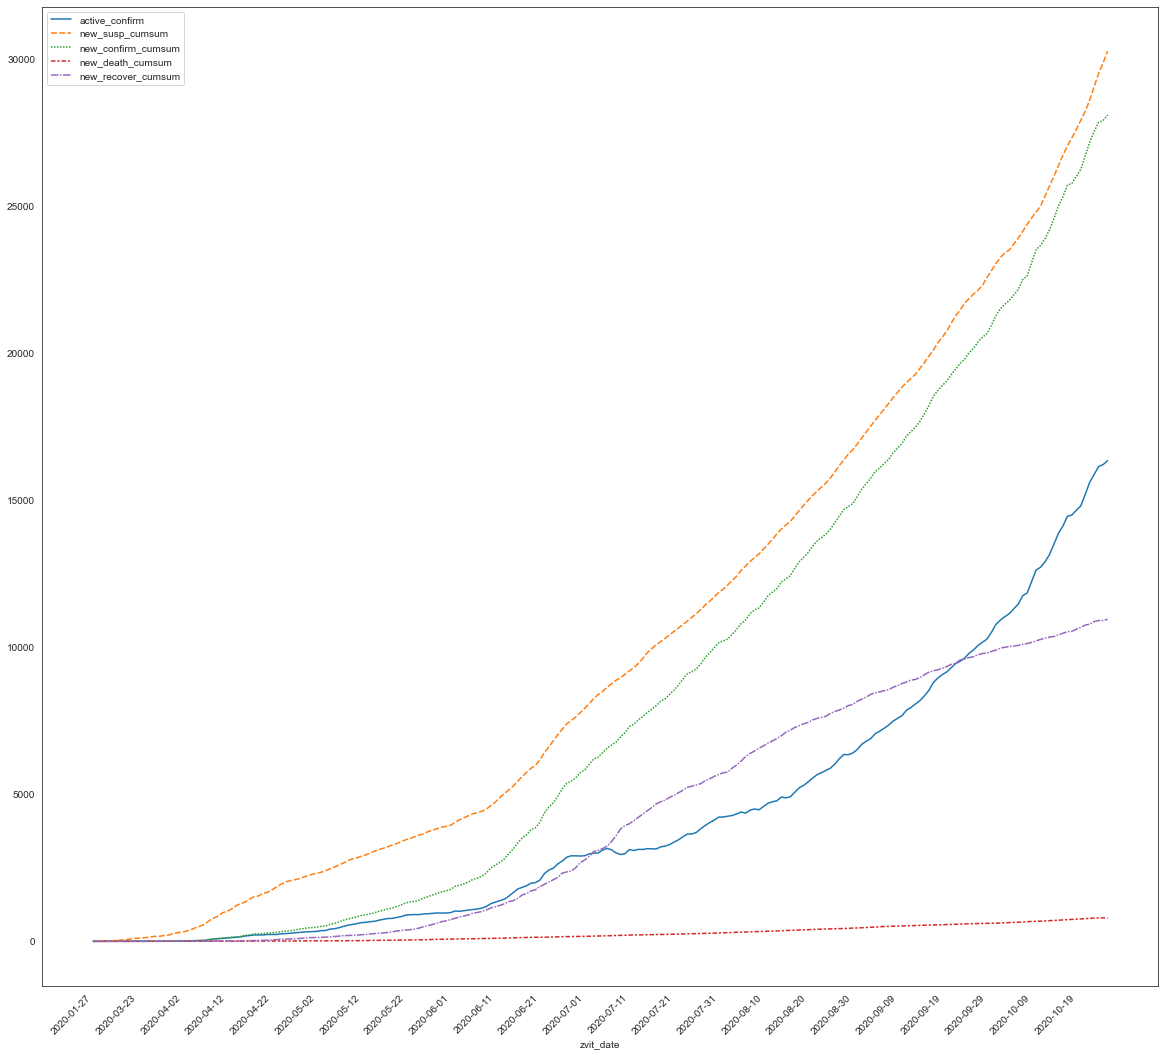

In [160]:
figure = plt.figure(figsize=(20, 20))
figure.autofmt_xdate()
plot = sns.lineplot(data=df[['active_confirm', 'new_susp_cumsum', 'new_confirm_cumsum', 'new_death_cumsum', 'new_recover_cumsum']])
for ind, label in enumerate(plot.get_xticklabels()):
    label.set_visible(ind % 10 == 0)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'
)
plt.show()

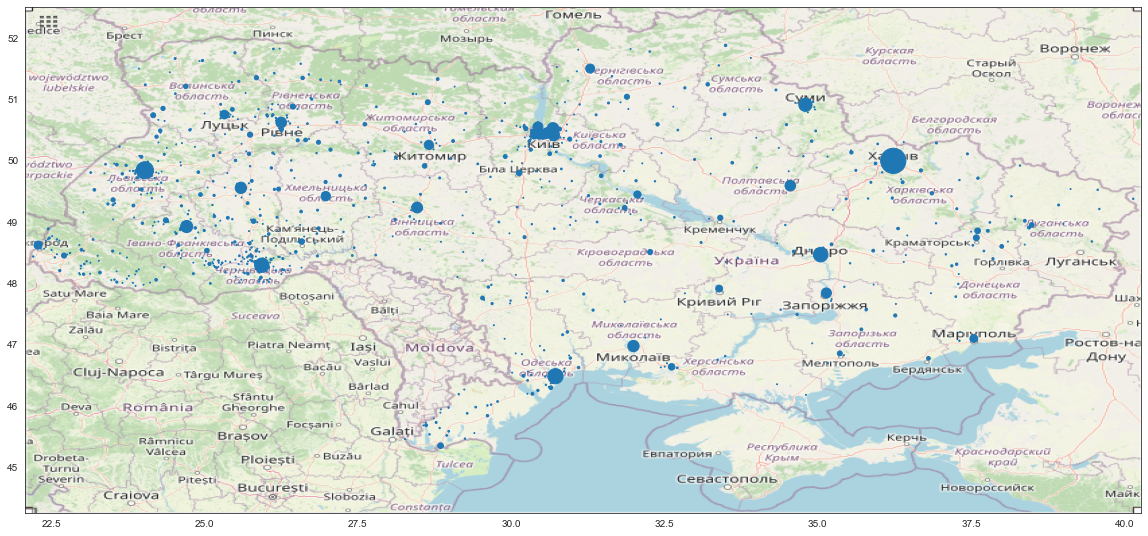

In [162]:
ukraine_map = plt.imread('data/map.png')
fig, ax = plt.subplots(figsize = (20, 20))
ax.scatter(df_with_lat_lon.registration_settlement_lng, df_with_lat_lon.registration_settlement_lat, zorder=1, s=df_with_lat_lon.total_confirm//40)
ax.set_xlim(BBOX[0], BBOX[1])
ax.set_ylim(BBOX[2], BBOX[3])
ax.imshow(ukraine_map, extent=BBOX, zorder=0)
plt.show()

In [167]:
df.to_excel('output/output.xlsx')